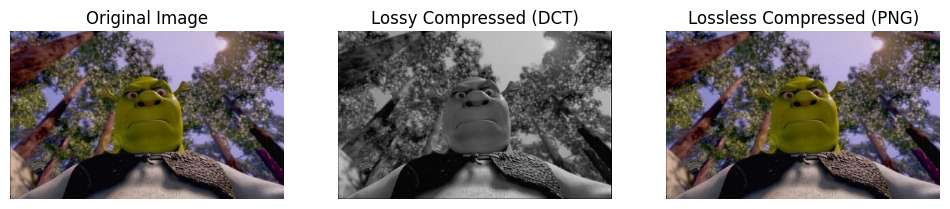

In [ ]:
import numpy as np
import cv2
import io
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct, idct

# Standard JPEG Luminance Quantization Matrix
JPEG_QUANT_MATRIX = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# Apply DCT and IDCT
def apply_dct(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def apply_idct(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Quantization
def quantize(dct_block, quality_factor=50):
    scale = max(1, (100 - quality_factor) / 50)
    quant_matrix = JPEG_QUANT_MATRIX * scale
    return np.round(dct_block / quant_matrix) * quant_matrix

# Padding function
def pad_image(image):
    h, w = image.shape
    new_h = (h + 7) // 8 * 8
    new_w = (w + 7) // 8 * 8
    padded = np.zeros((new_h, new_w), dtype=np.float32)
    padded[:h, :w] = image
    return padded, h, w

# Lossy compression (DCT-based)
def compress_image(image, quality_factor=50):
    padded_img, h, w = pad_image(image)
    compressed = np.zeros_like(padded_img)
    for i in range(0, padded_img.shape[0], 8):
        for j in range(0, padded_img.shape[1], 8):
            block = padded_img[i:i+8, j:j+8]
            dct_block = apply_dct(block)
            quantized_block = quantize(dct_block, quality_factor)
            compressed[i:i+8, j:j+8] = quantized_block
    return compressed[:h, :w]

# Decompression
def decompress_image(dct_image):
    h, w = dct_image.shape
    reconstructed = np.zeros((h, w), dtype=np.float32)
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = dct_image[i:i+8, j:j+8]
            reconstructed[i:i+8, j:j+8] = apply_idct(block)
    return np.clip(reconstructed, 0, 255).astype(np.uint8)

# Lossless PNG compression
def compress_png(image):
    png_buffer = io.BytesIO()
    image.save(png_buffer, "PNG", optimize=True)
    compressed_png = Image.open(png_buffer)
    compressed_png.save("compressed_lossless.png")  # Save PNG file
    return png_buffer.tell(), compressed_png

# Compression and display function
def compress_and_show(image_path, quality=50):
    img = Image.open(image_path)
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

    # Original size
    original_buffer = io.BytesIO()
    img.save(original_buffer, format=img.format)
    original_size = original_buffer.tell()

    # Lossy compression
    dct_compressed = compress_image(img_gray, quality_factor=quality)
    reconstructed_img = decompress_image(dct_compressed)
    Image.fromarray(reconstructed_img).save("compressed_lossy.jpg", "JPEG", quality=quality)

    # Lossless compression
    png_size, compressed_png = compress_png(img)

    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title(f"Lossy Compressed (DCT)")
    ax[1].axis("off")
    ax[2].imshow(compressed_png)
    ax[2].set_title("Lossless Compressed (PNG)")
    ax[2].axis("off")
    plt.show()

# Run function
image_path = "shrek.jpg"
compress_and_show(image_path, quality=50)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

---------- MNIST Dataset Results ----------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.8184 - loss: 0.5982
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9690 - loss: 0.1001
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9799 - loss: 0.0645
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9833 - loss: 0.0508
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9873 - loss: 0.0362
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9850 - loss: 0.0427
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9870 - loss: 0.0351
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9898 - loss: 0.0329
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9893 - loss: 0.0321
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9937 - loss: 0.0199
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9944 - loss: 0.0195
Epoch 12/50
188/188 ━━━━━━━━━━━━━

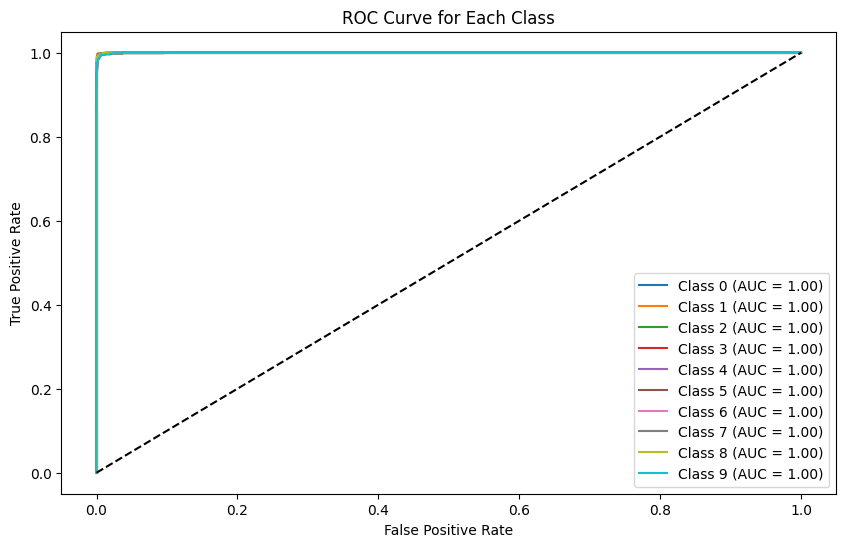

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, cifar10
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to Build CNN Model
def build_cnn(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),

        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to Train and Evaluate CNN
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    # Training the model
    model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nFinal Accuracy: {accuracy:.4f}")

    # Predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test_labels, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred))

    # AUC Score (One-vs-Rest)
    auc = roc_auc_score(y_test, model.predict(x_test), multi_class='ovr')
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve for Each Class
    plt.figure(figsize=(10, 6))
    for i in range(y_test.shape[1]):
        fpr, tpr, _ = roc_curve(y_test[:, i], model.predict(x_test)[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test[:, i], model.predict(x_test)[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend()
    plt.show()

# Load and Preprocess MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Perform 80-20 Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build and Train CNN on MNIST
print("\n---------- MNIST Dataset Results ----------")
mnist_model = build_cnn((28, 28, 1), 10)
train_and_evaluate(mnist_model, x_val, y_val, x_test, y_test)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 424s 530ms/step - accuracy: 0.3450 - loss: 2.0549 - val_accuracy: 0.5250 - val_loss: 1.4759 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 447s 536ms/step - accuracy: 0.5506 - loss: 1.3566 - val_accuracy: 0.6465 - val_loss: 1.0745 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 421s 538ms/step - accuracy: 0.6152 - loss: 1.1762 - val_accuracy: 0.6522 - val_loss: 1.0809 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 432s 553ms/step - accuracy: 0.6474 - loss: 1.0831 - val_accuracy: 0.6711 - val_loss: 1.0752 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 428s 548ms/step - accuracy: 0.6657 - loss: 1.0380 - val_accuracy: 0.6956 - val_loss: 0.9539 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 423s 541ms/step - accuracy: 0.6773 - loss: 1.0064 - val_accuracy: 0.6831 - val_loss: 1.0731 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 424s 542ms/step - accura

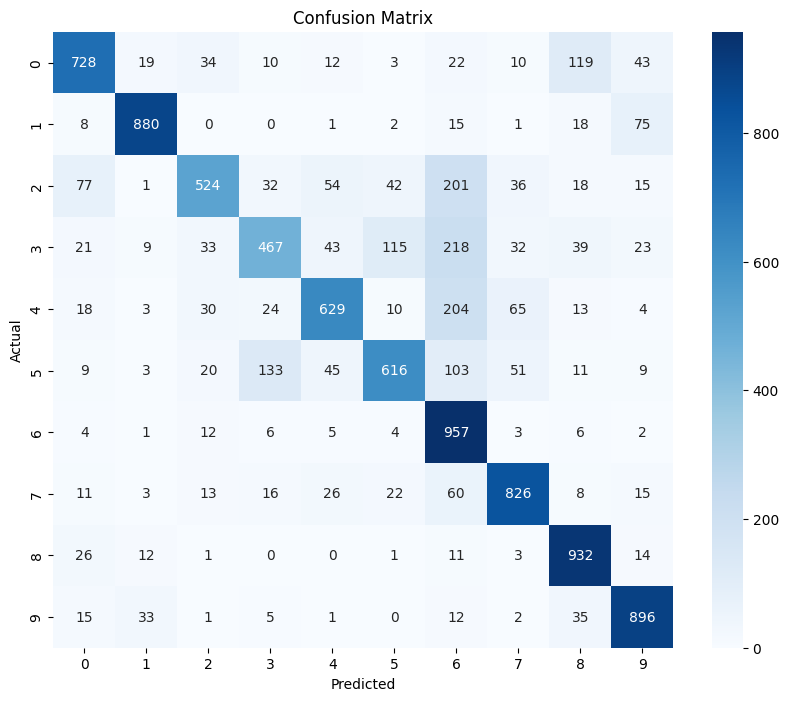

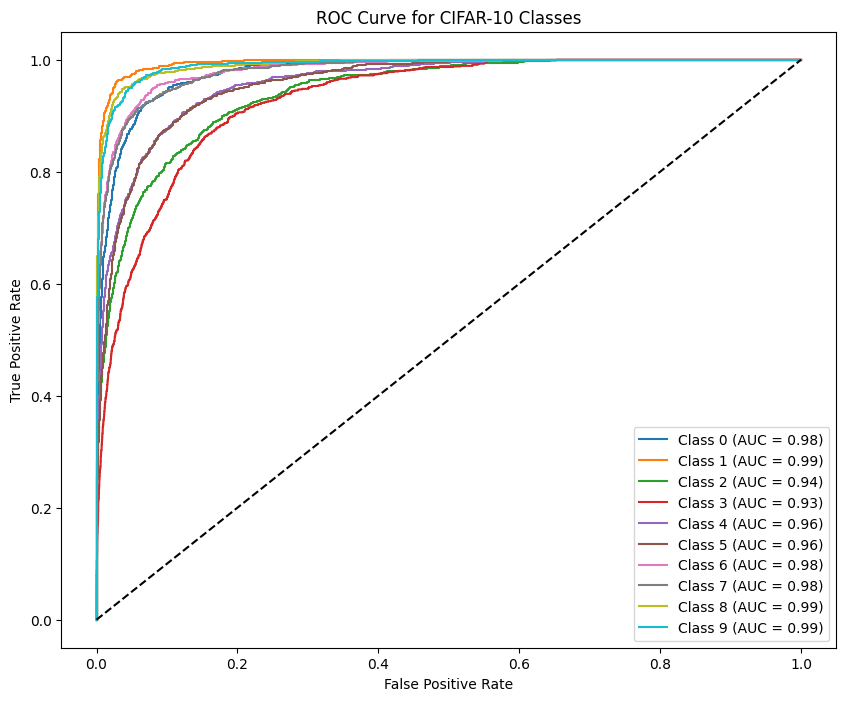

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation=None, input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Conv2D(32, (3,3), padding='same', activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3,3), padding='same', activation=None, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Conv2D(64, (3,3), padding='same', activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation=None, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=10,
    callbacks=[lr_reduction, early_stopping],
    verbose=1
)

# Evaluate model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {acc * 100:.2f}%")

# Predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.flatten()

# Classification Report
report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC-AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CIFAR-10 Classes')
plt.legend(loc="lower right")
plt.show()
